<table border=0><tr><td><img src="https://frontiermarketnews.files.wordpress.com/2017/03/coverhappy.jpg" width=550></td></tr></table>

#### In this lecture, we will use the data from the [World Happiness Report 2020](https://worldhappiness.report/ed/2020/#read) to learn the followings:
- Plotting regression lines and confidence intervals. [What is regression?](https://realpython.com/linear-regression-in-python/)
- Plotting pairwise relationships
- Conditioning charts on categories

Here are the descriptions of the data:
1. `Country`: The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.
2. `Year`: This dataset contains survey data of the state of global happiness from 2005 to 2018.
3. `Life ladder`: Also know as, Cantril ladder. Respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale.
4. `GDP per capita` is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.
5. The time series of `healthy life expectancy at birth` are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used.
6. `Social support` is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
7. `Freedom to make life choices` is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
8. `Generosity` is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.
9. `Perceptions of corruption` are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.
10. `Positive affect` is defined as the average of previous-day affect measures for happiness, laughter, and enjoyment for GWP waves 3-7 (years 2008 to 2012, and some in 2013). It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday? See pp. 1-2 of Statistical Appendix 1 for more details.
11. `Negative affect` is defined as the average of previous-day affect measures for worry, sadness, and anger for all waves.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
happiness_url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/world_happiness_report_2020.csv"
happy = pd.read_csv(happiness_url)

happy.shape


(1704, 11)

In [ ]:
# Rename headers for some columns
happy = happy.rename(columns={"Life_Ladder":"Happiness",
                      "Log_GDP_per_capita":"Wealth",
                      "Social_support":"Social support",
                      "Healthy_life_expectancy_at_birth":"Life expectancy",
                      "Freedom_to_make_life_choices":"Freedom",
                      "Perceptions_of_corruption":"Corruption perceptions",
                      "Positive_affect":"Positive affect",
                      "Negative_affect":"Negative affect"})
happy

Country  Year  Happiness    Wealth  Social support  Life expectancy  \
0     Afghanistan  2008   3.723590  7.168690        0.450662        50.799999   
1     Afghanistan  2009   4.401778  7.333790        0.552308        51.200001   
2     Afghanistan  2010   4.758381  7.386629        0.539075        51.599998   
3     Afghanistan  2011   3.831719  7.415019        0.521104        51.919998   
4     Afghanistan  2012   3.782938  7.517126        0.520637        52.240002   
...           ...   ...        ...       ...             ...              ...   
1699     Zimbabwe  2014   4.184451  7.562753        0.765839        52.380001   
1700     Zimbabwe  2015   3.703191  7.556052        0.735800        53.799999   
1701     Zimbabwe  2016   3.735400  7.538829        0.768425        54.400002   
1702     Zimbabwe  2017   3.638300  7.549491        0.754147        55.000000   
1703     Zimbabwe  2018   3.616480  7.553395        0.775388        55.599998   

       Freedom  Generosity  Corruption perceptions  Positive affect  \
0     0.718114    0.177889                0.881686         0.517637   
1     0.678896    0.200178                0.850035         0.583926   
2     0.600127    0.134353                0.706766         0.618265   
3     0.495901    0.172137                0.731109         0.611387   
4     0.530935    0.244273                0.775620         0.710385   
...        ...         ...                     ...              ...   
1699  0.642034   -0.048634                0.820217         0.725214   
1700  0.667193   -0.097354                0.810457         0.715079   
1701  0.732971   -0.068105                0.723612         0.737636   
1702  0.752826   -0.069670                0.751208         0.806428   
1703  0.762675   -0.038384                0.844209         0.710119   

      Negative affect  
0            0.258195  
1            0.237092  
2            0.275324  
3            0.267175  
4            0.267919  
...               ...  
1699         0.239111  
1700         0.178861  
1701         0.208555  
1702         0.224051  
1703         0.211726  

[1704 rows x 11 columns]

In [ ]:
happy.head()

Country  Year  Happiness    Wealth  Social support  Life expectancy  \
0  Afghanistan  2008   3.723590  7.168690        0.450662        50.799999   
1  Afghanistan  2009   4.401778  7.333790        0.552308        51.200001   
2  Afghanistan  2010   4.758381  7.386629        0.539075        51.599998   
3  Afghanistan  2011   3.831719  7.415019        0.521104        51.919998   
4  Afghanistan  2012   3.782938  7.517126        0.520637        52.240002   

    Freedom  Generosity  Corruption perceptions  Positive affect  \
0  0.718114    0.177889                0.881686         0.517637   
1  0.678896    0.200178                0.850035         0.583926   
2  0.600127    0.134353                0.706766         0.618265   
3  0.495901    0.172137                0.731109         0.611387   
4  0.530935    0.244273                0.775620         0.710385   

   Negative affect  
0         0.258195  
1         0.237092  
2         0.275324  
3         0.267175  
4         0.267919

In [ ]:
# check the size of our dataset
happy.shape
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1704 non-null   object 
 1   Year                    1704 non-null   int64  
 2   Happiness               1704 non-null   float64
 3   Wealth                  1676 non-null   float64
 4   Social support          1691 non-null   float64
 5   Life expectancy         1676 non-null   float64
 6   Freedom                 1675 non-null   float64
 7   Generosity              1622 non-null   float64
 8   Corruption perceptions  1608 non-null   float64
 9   Positive affect         1685 non-null   float64
 10  Negative affect         1691 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 146.6+ KB


In [ ]:
happy[happy["Corruption perceptions"].isnull()]

Country  Year  Happiness     Wealth  Social support  Life expectancy  \
25    Algeria  2014   6.354898   9.509210        0.818189        65.139999   
26    Algeria  2016   5.340854   9.541166        0.748588        65.500000   
100   Bahrain  2014   6.165134  10.688241             NaN        67.419998   
101   Bahrain  2015   6.007375  10.690272        0.852551        67.699997   
102   Bahrain  2016   6.169673  10.683798        0.862700        68.099998   
...       ...   ...        ...        ...             ...              ...   
1664  Vietnam  2015   5.076315   8.622428        0.848677        67.300003   
1666  Vietnam  2017   5.175279   8.727759             NaN        67.699997   
1668    Yemen  2007   4.477133   8.340983        0.824969        53.400002   
1676    Yemen  2016   3.825631   7.299221        0.775407        55.099998   
1677    Yemen  2017   3.253560        NaN        0.789555        55.900002   

       Freedom  Generosity  Corruption perceptions  Positive affect  \
25         NaN         NaN                     NaN         0.625905   
26         NaN         NaN                     NaN         0.660510   
100        NaN         NaN                     NaN              NaN   
101   0.849521    0.103796                     NaN         0.715543   
102   0.888691    0.080129                     NaN         0.787187   
...        ...         ...                     ...              ...   
1664       NaN    0.087423                     NaN         0.642237   
1666       NaN         NaN                     NaN              NaN   
1668  0.672685   -0.005798                     NaN         0.591898   
1676  0.532964   -0.125668                     NaN         0.469345   
1677  0.595191         NaN                     NaN         0.455182   

      Negative affect  
25           0.176866  
26           0.377112  
100               NaN  
101          0.302972  
102          0.283466  
...               ...  
1664         0.232416  
1666              NaN  
1668         0.378784  
1676         0.227925  
1677         0.295064  

[96 rows x 11 columns]

In [ ]:
# check if there are missing data in each column
happy.isnull().sum()

Country                    0
Year                       0
Happiness                  0
Wealth                    28
Social support            13
Life expectancy           28
Freedom                   29
Generosity                82
Corruption perceptions    96
Positive affect           19
Negative affect           13
dtype: int64

In [ ]:
# check the data type of each column
happy.dtypes

Country                    object
Year                        int64
Happiness                 float64
Wealth                    float64
Social support            float64
Life expectancy           float64
Freedom                   float64
Generosity                float64
Corruption perceptions    float64
Positive affect           float64
Negative affect           float64
dtype: object

## Plotting regression lines and confidence intervals

Let's look at the relationship between `Happiness` and `Freedom`.


Although seaborn is not a statistics package, it does carry out a few statistical methods for the purposes of visualizion. The various regression functions don’t deal well with missing data or integers, so to avoid errors we’ll first make a copy of our data with all integer columns converted to floating point, and all missing data removed:

In [ ]:
happy = happy.dropna()
happy.shape

(1512, 11)

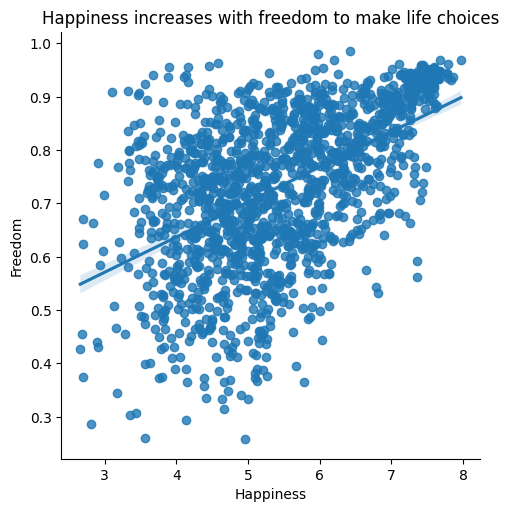

In [ ]:
# Linear regression plot
sns.lmplot(data=happy,
           x="Happiness",
           y="Freedom")
plt.title("Happiness increases with freedom to make life choices");

It's hard to see when the data points are big. Let's reduce the size of the data points by setting the `scatter_kws` argument ([lmplot documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html))

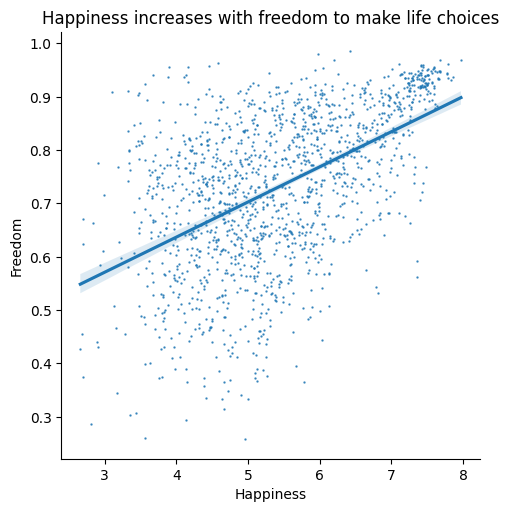

In [ ]:
sns.lmplot(data=happy,
           x="Happiness",
           y="Freedom",
           markers='.',
           scatter_kws={'s':2})
plt.title("Happiness increases with freedom to make life choices");

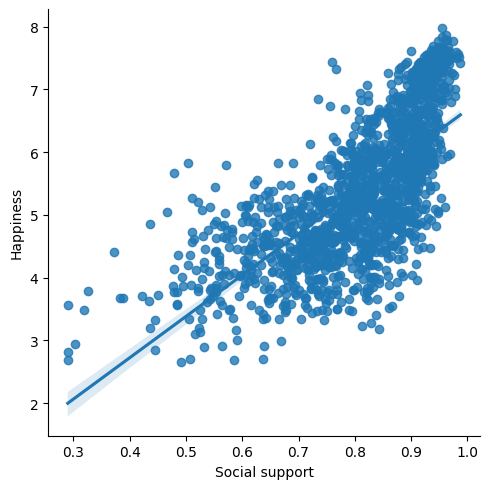

In [ ]:
sns.lmplot(data=happy,
                x="Social support",
                y="Happiness")

With this we get a regression line with shaded 95% confidence intervals. There are a few options that are commonly
useful: setting ci=None turns off the confidence intervals (and speeds up plotting large datasets) and setting the
order argument fits a polynomial regression:

/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


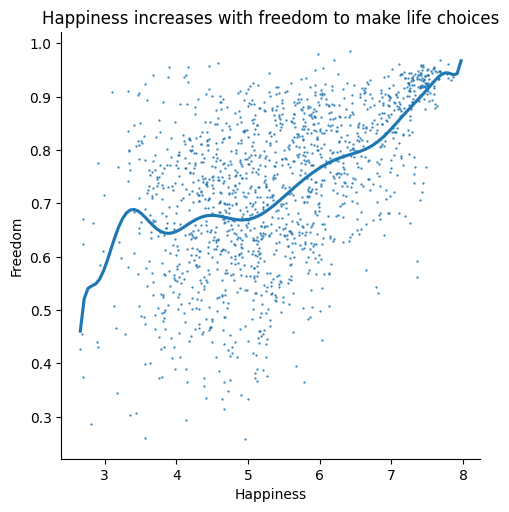

In [ ]:
# Polymonial regression plot
sns.lmplot(
    data=happy,
    x="Happiness",
    y="Freedom",
    # ci=90, # int
    ci=None, # no confidence interval
    order=20,
    markers='.',
    scatter_kws={'s':2}
)
plt.title(
"Happiness increases with freedom to make life choices"
);

An obvious question is how to get the actual results for the regression. There’s no way to obtain these from the plot, but it’s not hard to do using a python scientific package `scipy` . We have to make sure to use our floating point version of the data:

In [ ]:
from scipy import stats
linear_regression = stats.linregress(happy.Happiness,happy.Freedom)
print(linear_regression.slope) # can access attributes
linear_regression

0.06591423216850241


LinregressResult(slope=0.06591423216850241, intercept=0.3730970367531049, rvalue=0.5147722602066239, pvalue=4.478777477180371e-103, stderr=0.002825023533725479, intercept_stderr=0.015616528566836303)

From the object that’s returned by the stats.linregress function we can get the slope, intercept and p-value. Here is a good [post](https://thestatsninja.com/2018/11/07/the-analytics-pain-part-3-interpreting-p-values-with-linear-regression/) regarding how to interpret p-values with linear regression.

## Plotting pairwise relationships

Here we want to examine all the pairwise relationships. This typically happens when starting to look at a new dataset, either to identify variables that might be worth examining in more detail, or as a quick sanity check to look for obvious correlations that shouldn’t be there.

The `pairplot` function will take a dataframe and draw scatter plots for all pairs of numerical variables. This
typically creates a large figure, so we often want to make the individual charts smaller, and the point size smaller. Since we are only looking for factors that contribute to happiness, we will drop the Year and Country columns.

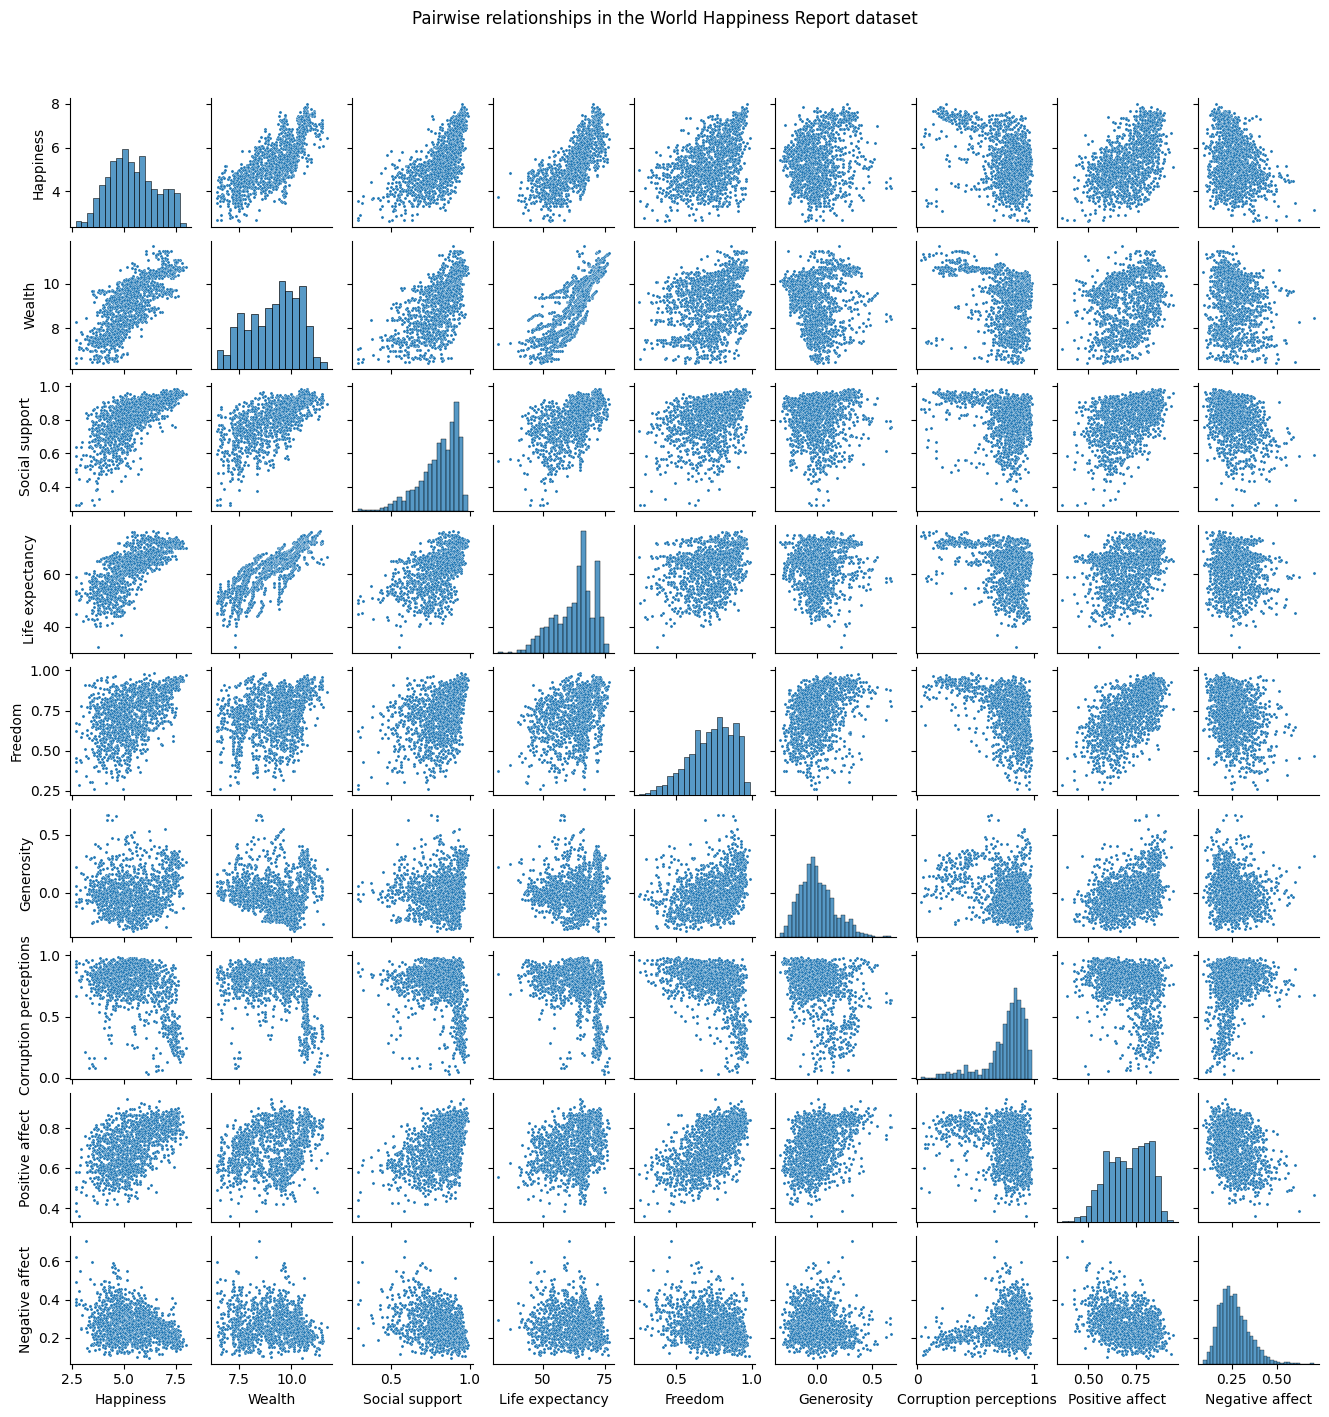

In [ ]:
# Pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    plot_kws={"s":5}, # draw small points
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

# While running - cautions with pair plots

Given the small size of the plots, it’s often helpeful to draw a regression line to make the patterns clearer. With large numbers of points, it’s nice to have the regression line drawn in a different color, to make it easier to see against the background of the points. A neutral, light color gives a good effect, deemphasizing the points to make the regression line stand out. Just like with our individual regression plots, we have to use the floating point version of the data:

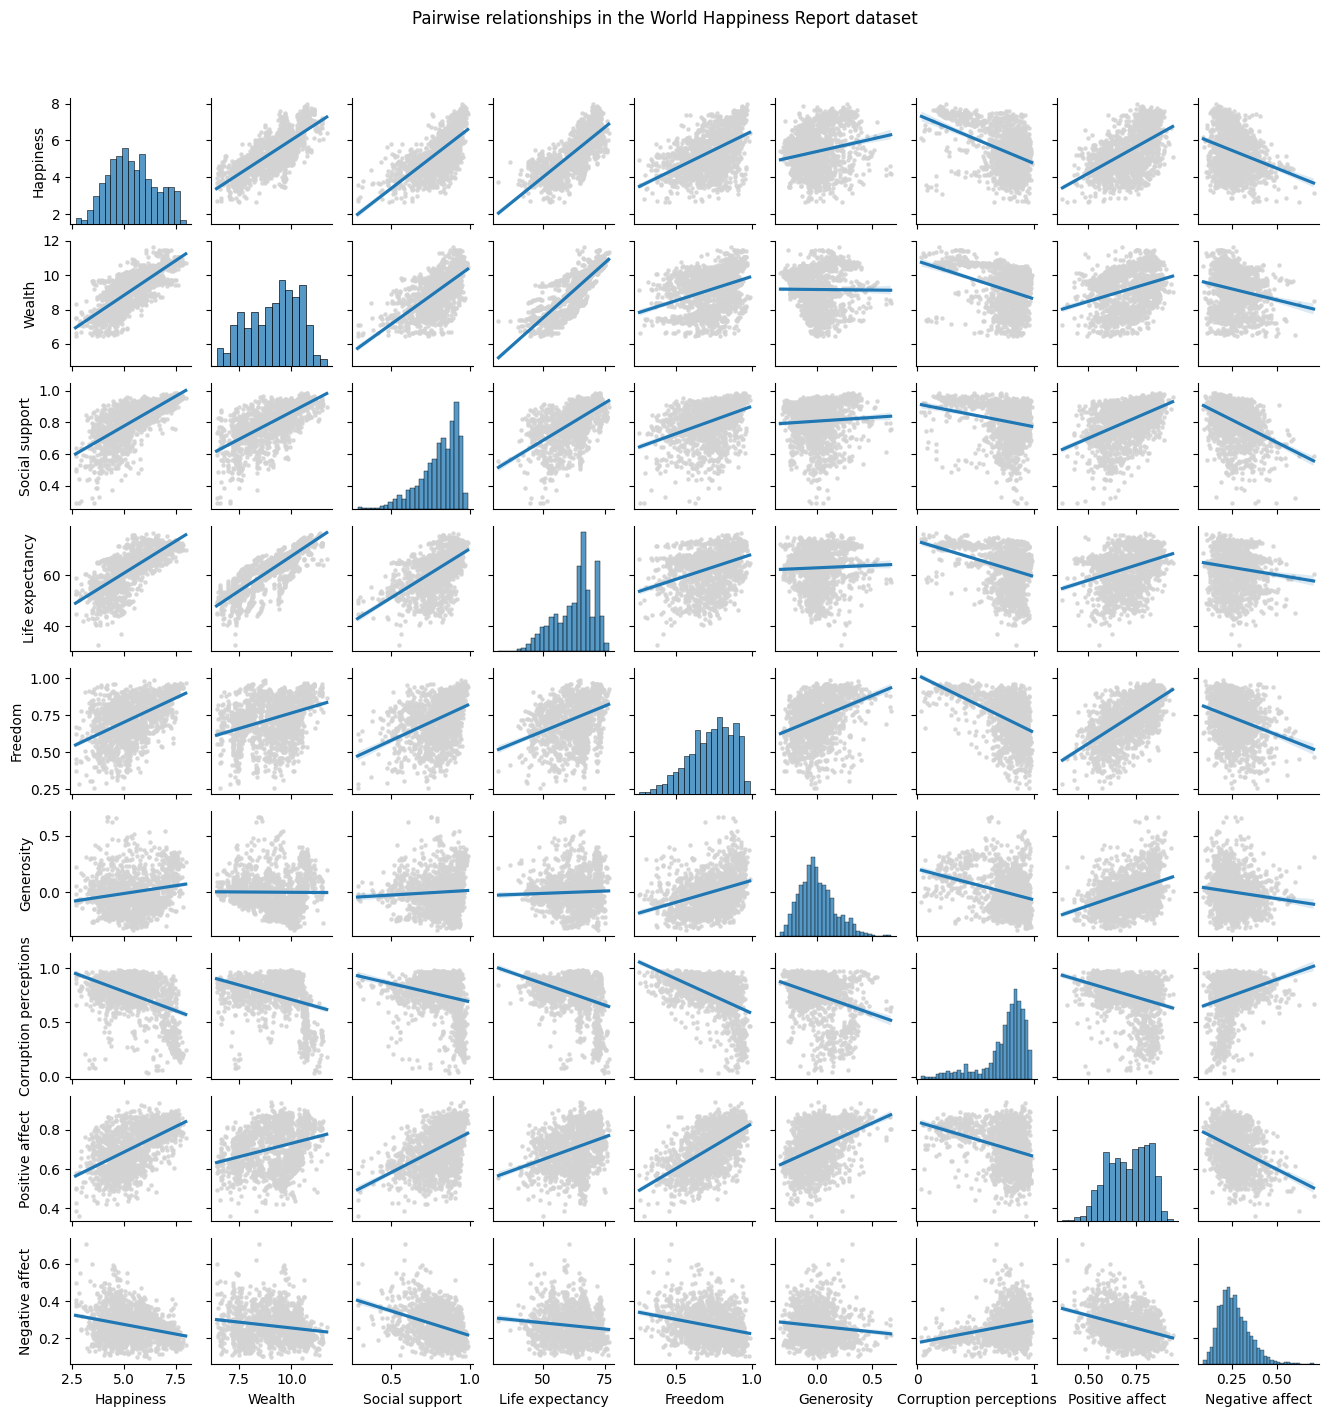

In [15]:
# Styled pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

We also have a nice example here of a pattern that simple linear regression fails to identify: Wealth vs Generosity. This illustrates the value of having the points and the regression plotted together - glancing just at the slope of the regression line we might conclude that nothing interesting. Switching to a polynomial regression line with order=2 does a better job of capturing the pattern:

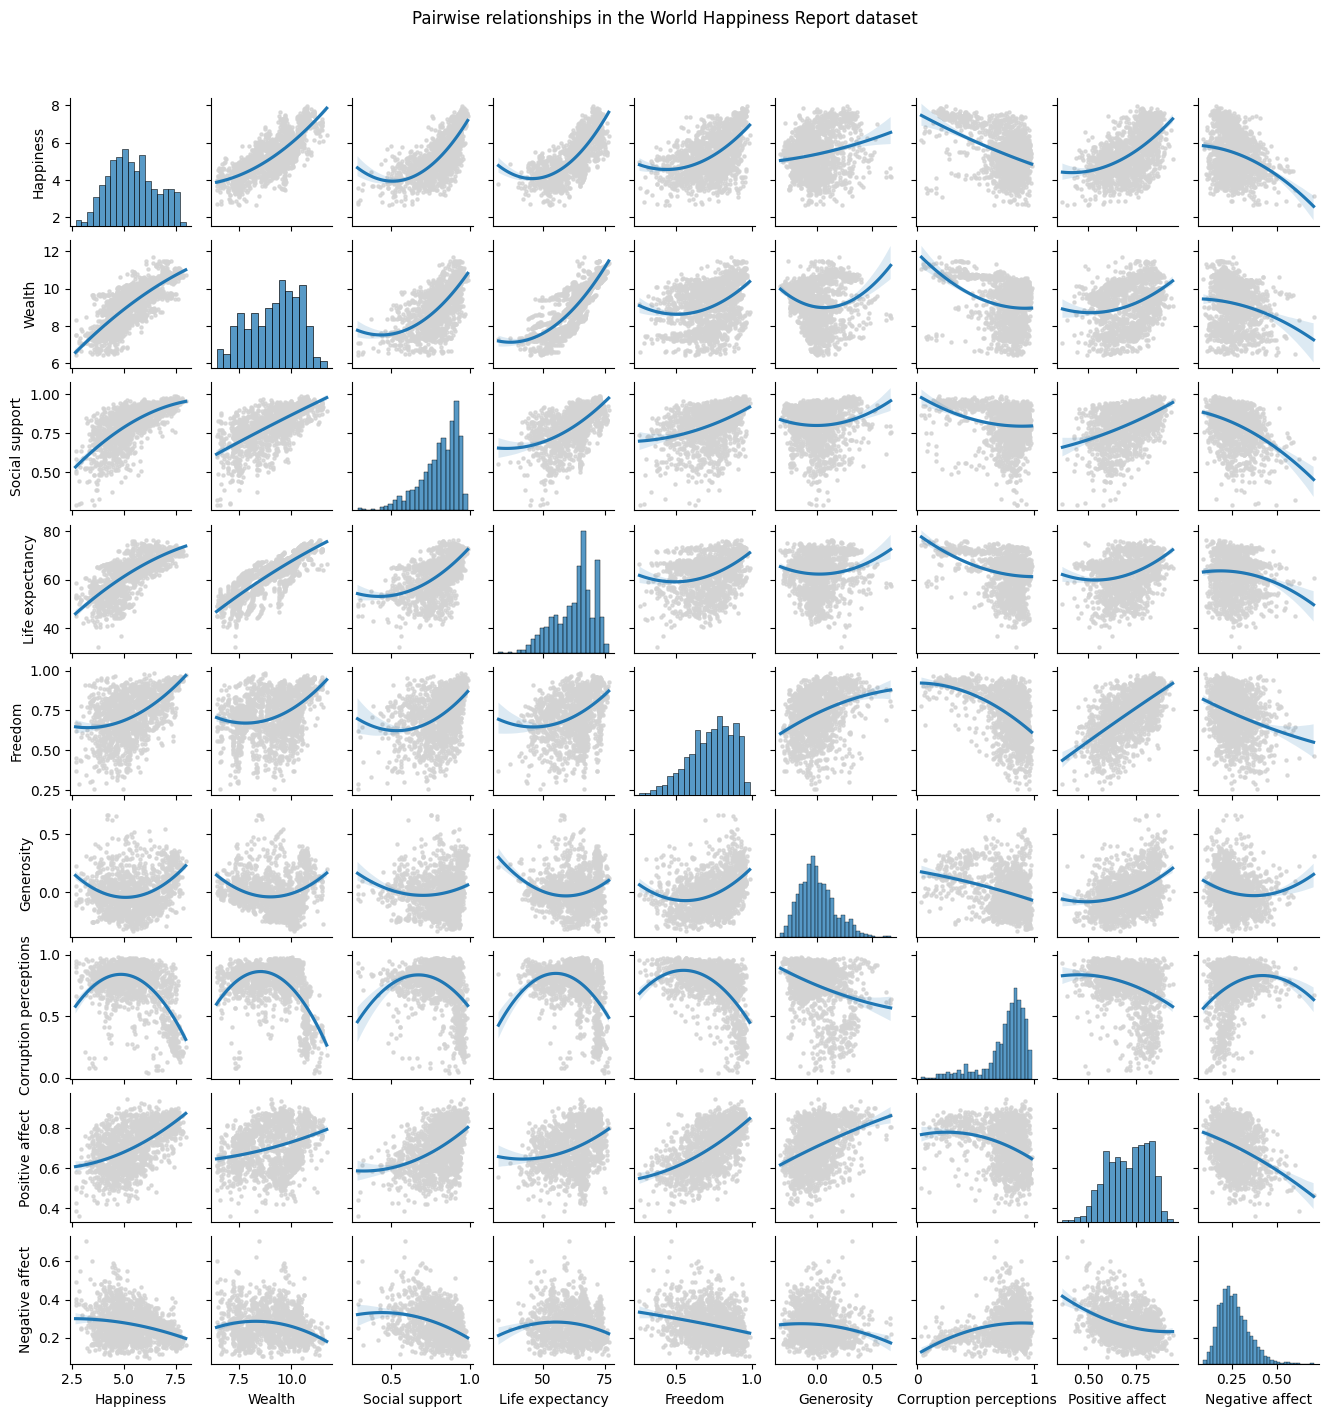

In [ ]:
# Polynomial pair plot
g=sns.pairplot(
    data=happy.drop(['Country','Year'], axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=1.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in the World Happiness Report dataset", y=1.05
);

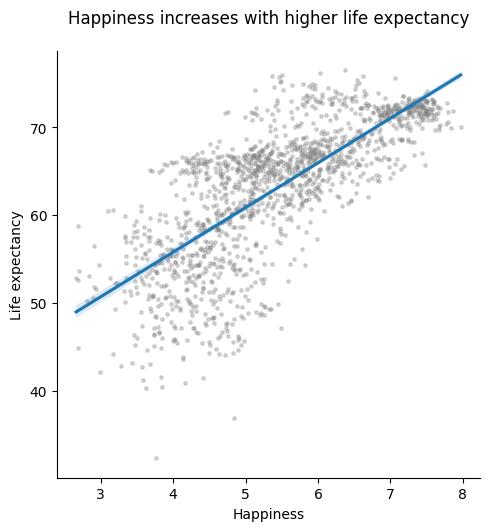

In [ ]:
# pull out a few values to plot

example_plot = sns.lmplot(data=happy,
                          x="Happiness",
                          y="Life expectancy",
                          scatter_kws={'s':6, "color":"grey", "alpha": 0.3},
                          )
plt.title("Happiness increases with higher life expectancy", pad=20);

## Conditioning charts on categories

In the previous few lecture we have explored the ability of seaborn to draw scatter plots showing various combinations of continuous numerical variables. Here’s a recent example which varies both the size and the color of the markers:

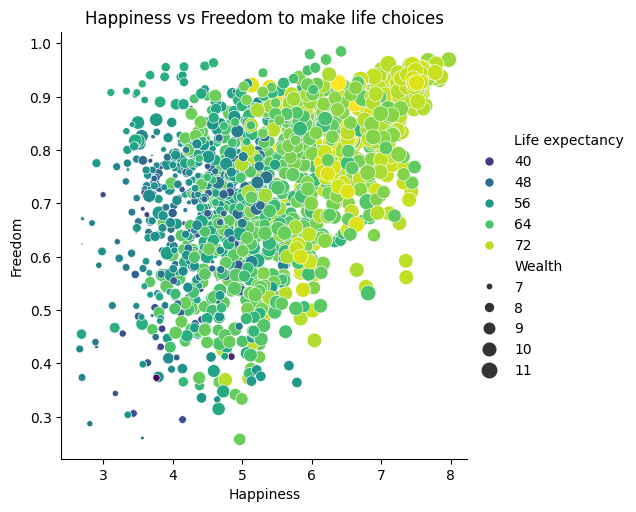

In [ ]:
sns.relplot(
    data=happy,
    x="Happiness",
    y="Freedom",
    size="Wealth",
    sizes=(2,150),
    hue="Life expectancy",
    palette="viridis"
)
plt.title("Happiness vs Freedom to make life choices");

If we want to look at `Happiness` vs `Life expectancy` for all the countries, we need to have a better plot to illustrate that since we have 156 countries in the dataset. Let's use a `relplot`:

<Axes: >

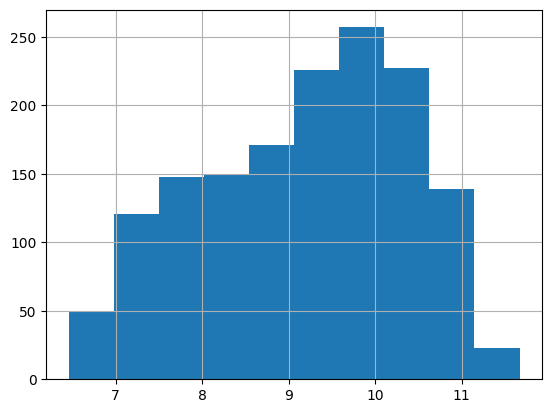

In [ ]:
happy.Wealth.hist()

In [ ]:
happy.Wealth.describe()

count    1512.000000
mean        9.171052
std         1.185701
min         6.457201
25%         8.223155
50%         9.364146
75%        10.131858
max        11.670484
Name: Wealth, dtype: float64

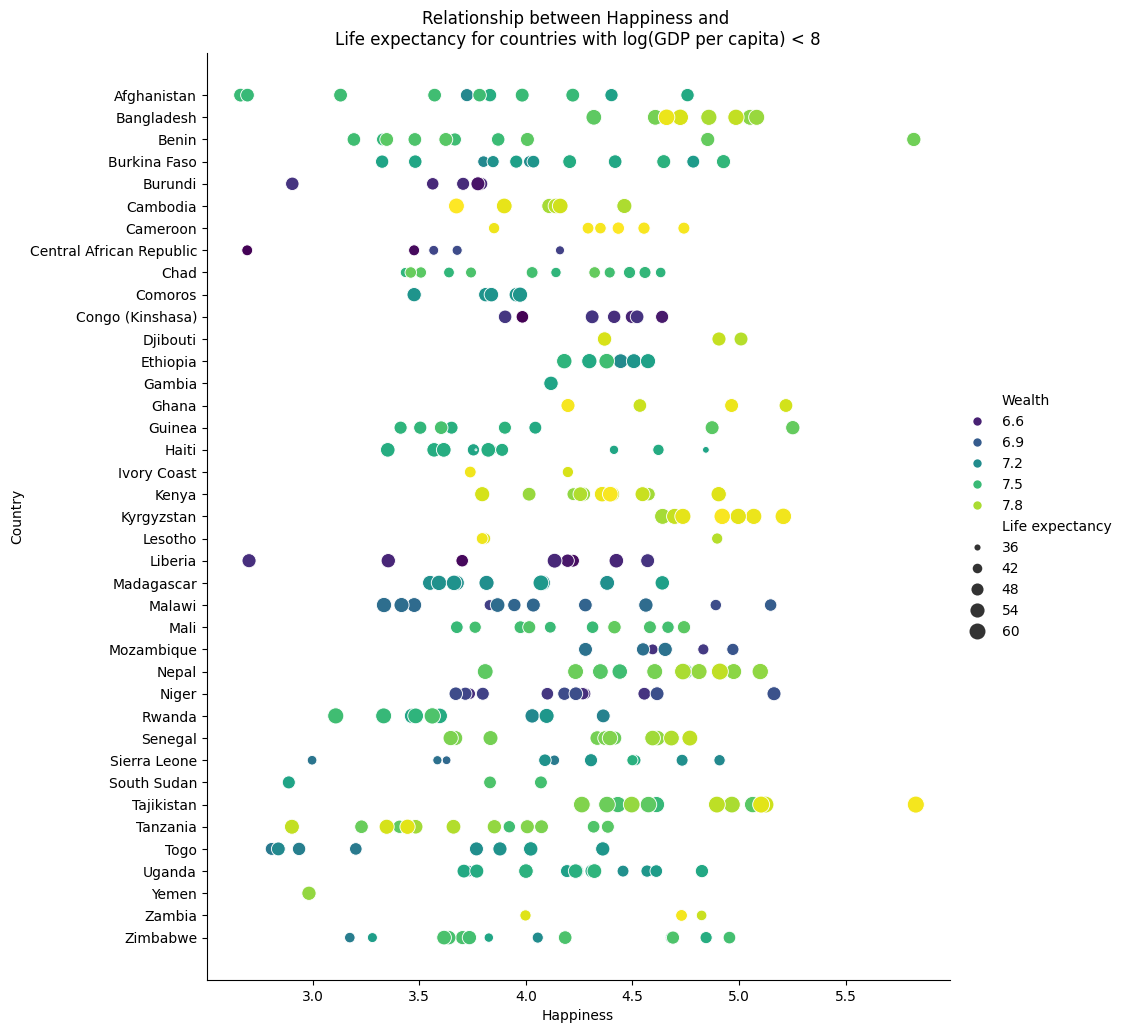

In [ ]:
sns.relplot(
    data=happy[happy["Wealth"] < 8],
    y="Country",
    x="Happiness",
    size="Life expectancy",
    sizes=(2,150),
    height=10,
    hue="Wealth",
    palette="viridis"
)
plt.title("Relationship between Happiness and \nLife expectancy for countries with log(GDP per capita) < 8");


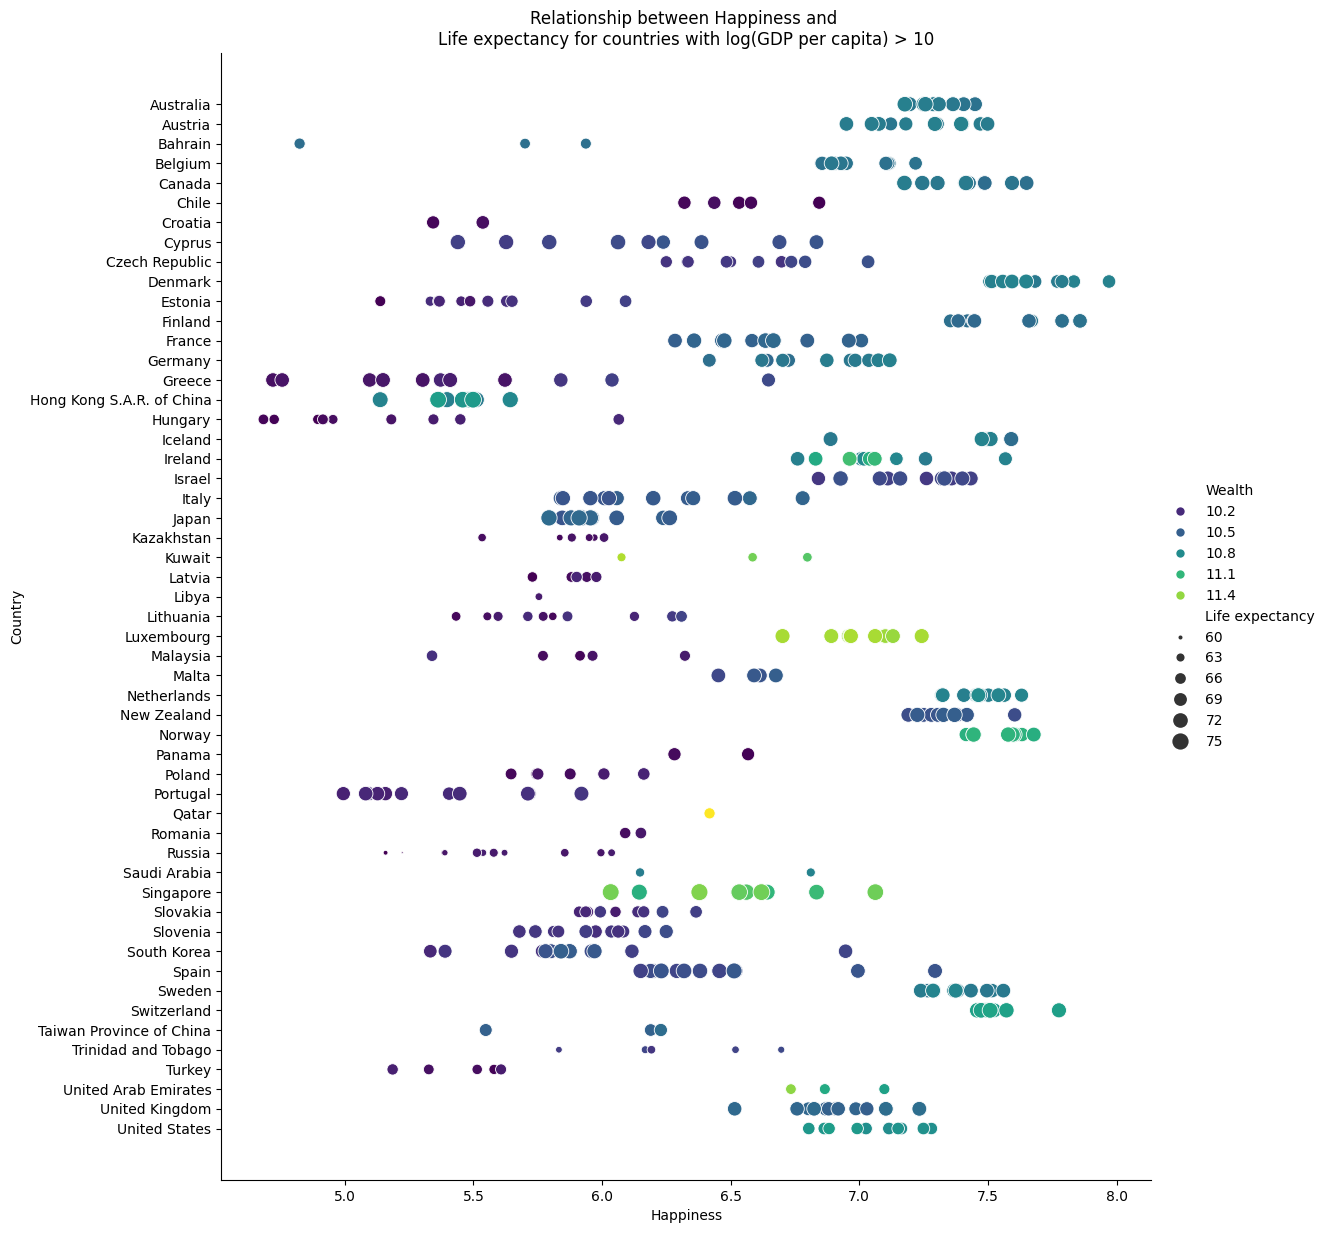

In [ ]:
sns.relplot(
    data=happy[happy["Wealth"] > 10],
    y="Country",
    x="Happiness",
    size="Life expectancy",
    sizes=(2,150),
    height=12,
    hue="Wealth",
    palette="viridis"
)
plt.title("Relationship between Happiness and \nLife expectancy for countries with log(GDP per capita) > 10");



Let's take a closer look at the relationship between `Wealth` and `Happiness` for a few countries.

In [ ]:
happy[(happy.Country == "France") | (happy.Country == "United States")]

Country  Year  Happiness     Wealth  Social support  \
497          France  2006   6.582700  10.521728        0.943929   
498          France  2008   7.008065  10.535243        0.935351   
499          France  2009   6.283498  10.500244        0.918159   
500          France  2010   6.797901  10.514770        0.942955   
501          France  2011   6.959185  10.530512        0.921286   
502          France  2012   6.649365  10.527497        0.937097   
503          France  2013   6.667121  10.528095        0.907691   
504          France  2014   6.466868  10.532729        0.877505   
505          France  2015   6.357625  10.539174        0.895719   
506          France  2016   6.475209  10.546988        0.884923   
507          France  2017   6.635222  10.561154        0.931495   
508          France  2018   6.665904  10.573352        0.921463   
1606  United States  2008   7.280386  10.827426        0.952587   
1607  United States  2009   7.158032  10.790511        0.911794   
1608  United States  2010   7.163616  10.807183        0.926159   
1609  United States  2011   7.115139  10.815644        0.921705   
1610  United States  2012   7.026227  10.830132        0.903192   
1611  United States  2013   7.249285  10.839653        0.925397   
1612  United States  2014   7.151114  10.857497        0.902097   
1613  United States  2015   6.863947  10.878154        0.903571   
1614  United States  2016   6.803600  10.885554        0.896751   
1615  United States  2017   6.991759  10.900906        0.921003   
1616  United States  2018   6.882685  10.922465        0.903856   

      Life expectancy   Freedom  Generosity  Corruption perceptions  \
497         71.480003  0.789121    0.121351                0.699270   
498         71.839996  0.833327   -0.035670                0.668876   
499         72.019997  0.798213   -0.086386                0.654168   
500         72.199997  0.849702   -0.108060                0.622954   
501         72.400002  0.903367   -0.106961                0.626625   
502         72.599998  0.841320   -0.153479                0.607905   
503         72.800003  0.877796   -0.128930                0.699069   
504         73.000000  0.803474   -0.122516                0.655637   
505         73.199997  0.817036   -0.143634                0.640602   
506         73.400002  0.786780   -0.095643                0.622697   
507         73.599998  0.833890   -0.127377                0.601486   
508         73.800003  0.816377   -0.141567                0.581775   
1606        68.379997  0.877956    0.246029                0.668495   
1607        68.540001  0.830684    0.192269                0.665394   
1608        68.699997  0.828044    0.235522                0.689583   
1609        68.680000  0.863202    0.152239                0.696926   
1610        68.660004  0.822662    0.206243                0.710034   
1611        68.639999  0.792256    0.265563                0.746894   
1612        68.620003  0.866077    0.212869                0.702267   
1613        68.599998  0.848753    0.210956                0.697543   
1614        68.500000  0.757893    0.135592                0.738920   
1615        68.400002  0.868497    0.188833                0.681191   
1616        68.300003  0.824607    0.107713                0.709928   

      Positive affect  Negative affect  
497          0.777402         0.288682  
498          0.745672         0.280619  
499          0.762939         0.303367  
500          0.789724         0.260568  
501          0.780809         0.280995  
502          0.754120         0.252988  
503          0.800136         0.204970  
504          0.811054         0.215894  
505          0.785966         0.215400  
506          0.772661         0.270036  
507          0.762098         0.241984  
508          0.767313         0.282451  
1606         0.871968         0.226823  
1607         0.843484         0.261661  
1608         0.860642         0.231053  
1609         0.836360         0.273379  
1

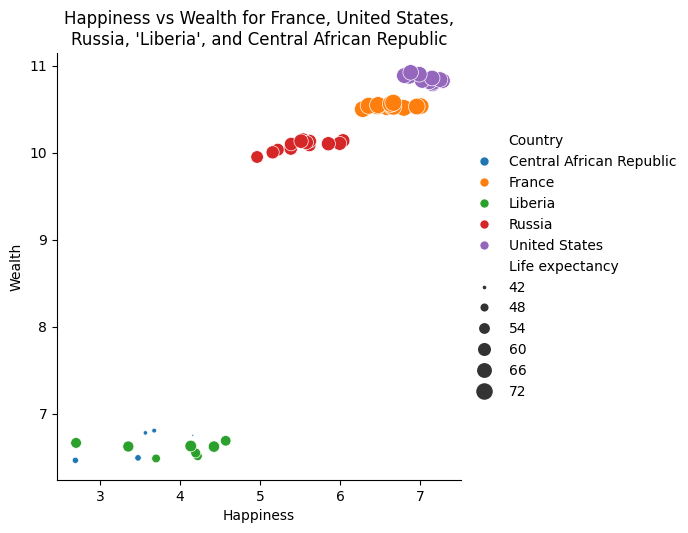

In [ ]:
few_countries = happy[happy.Country.isin(['France',
                                          'United States',
                                          'Russia',
                                          'Liberia',
                                          'Central African Republic'])
                     ]
sns.relplot(
    data=few_countries,
    x="Happiness",
    y="Wealth",
    size="Life expectancy",
    sizes=(2,150),
    hue="Country"
)
plt.title("Happiness vs Wealth for France, United States,\n" +
         "Russia, 'Liberia', and Central African Republic");

Instead of using `hue`, we can also use the marker styles to help identify data points for each country (as long as the number of countries is not too large).

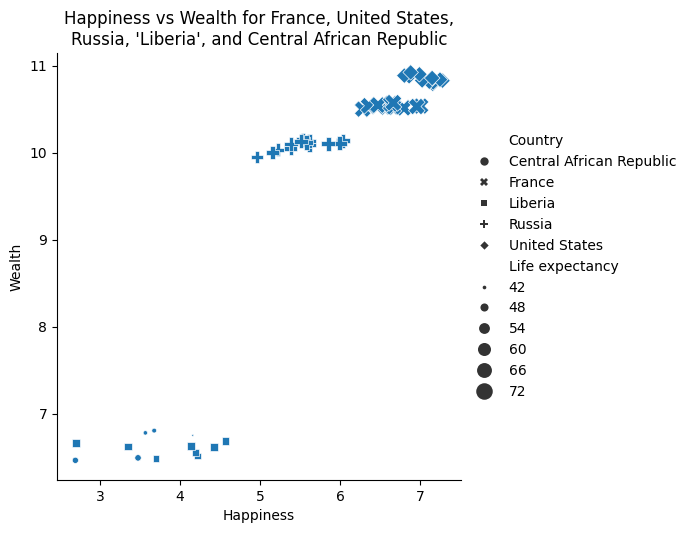

In [ ]:
sns.relplot(
    data=few_countries,
    x="Happiness",
    y="Wealth",
    size="Life expectancy",
    sizes=(2,150),
    style="Country"
)
plt.title("Happiness vs Wealth for France, United States,\n" +
         "Russia, 'Liberia', and Central African Republic");

We can still use the sizes to include additional information in the plot that uses marker styles

In this plot above, the marker styles are sufficient to show the pattern that people in wealthier countries are happier. But some of the data points for Liberia and Central African Republic overlap. Perhaps the most powerful way to split up our data into categories is simply to draw multiple charts with the same axes. This approach has many names (different tools refer to it as a trellis, lattice or grid chart) but here we will
call it small multiples. We can draw these in seaborn by assigning column names to the `row` and `col` argument to `relplot`

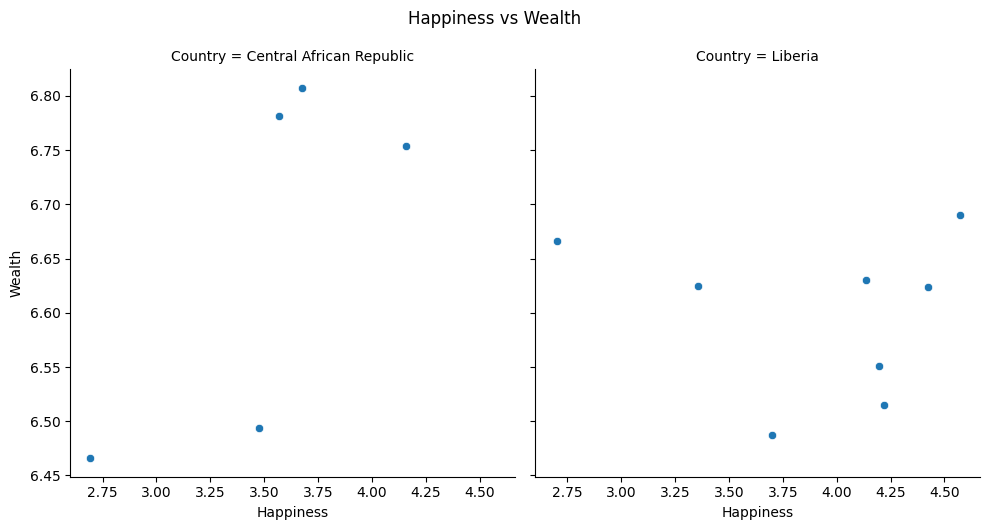

In [ ]:
g=sns.relplot(
    data=happy[happy.Country.isin(['Liberia',
                                   'Central African Republic'])],
    x="Happiness",
    y="Wealth",
    col="Country",
)
g.fig.suptitle("Happiness vs Wealth", y=1.05);
# plt.title("Hapiness vs Wealth");

Because the two plots share the same axes, it’s easy to compare them. Notice that now each plot gets its own title telling us which country it’s displaying, so to display an overall title we need to call `suptitle` (supertitle) on the figure. In fact, `relplot` always creates a grid of plots, even when we draw a single plot. This is the reason behind the variable name `g` that we use for the return value. When using a supertitle, we have to tell seaborn how much space we want
between the charts and the title by setting the `y` argument. The value of `1.05` which we’ve used above usually looks good, but we can increase it if we want more spacing.

If we set `col` and `row` separately, we’ll get a two dimensional grid. Let’s compare the `Life expectancy` amongst people based on happiness. First let's create a new column in the dataset to categorize happiness.

In [ ]:
happy.Happiness.describe()

count    1512.000000
mean        5.409960
std         1.136302
min         2.661718
25%         4.556063
50%         5.304165
75%         6.210087
max         7.970892
Name: Happiness, dtype: float64

In [ ]:
# Create a new column in the dataframe to group each data point into two groups.
happy['ishappy'] = [True if x > 5.3 else False for x in happy['Happiness']]

<ipython-input-28-f54a359001e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy['ishappy'] = [True if x > 5.3 else False for x in happy['Happiness']]


A useful trick when we want to display small multiples using a single category that has a large number of variables is to wrap columns. This works particularly well when the values have a natural order. For example, the year column behaves like a category in that it takes a number of descrete values, but those values have an obvious ordering. Trying to display a dozen separate plots - one for each year - on a single row has obvious drawbacks, but if we specify `col_wrap` then we can limit each row to a sensible number of charts:

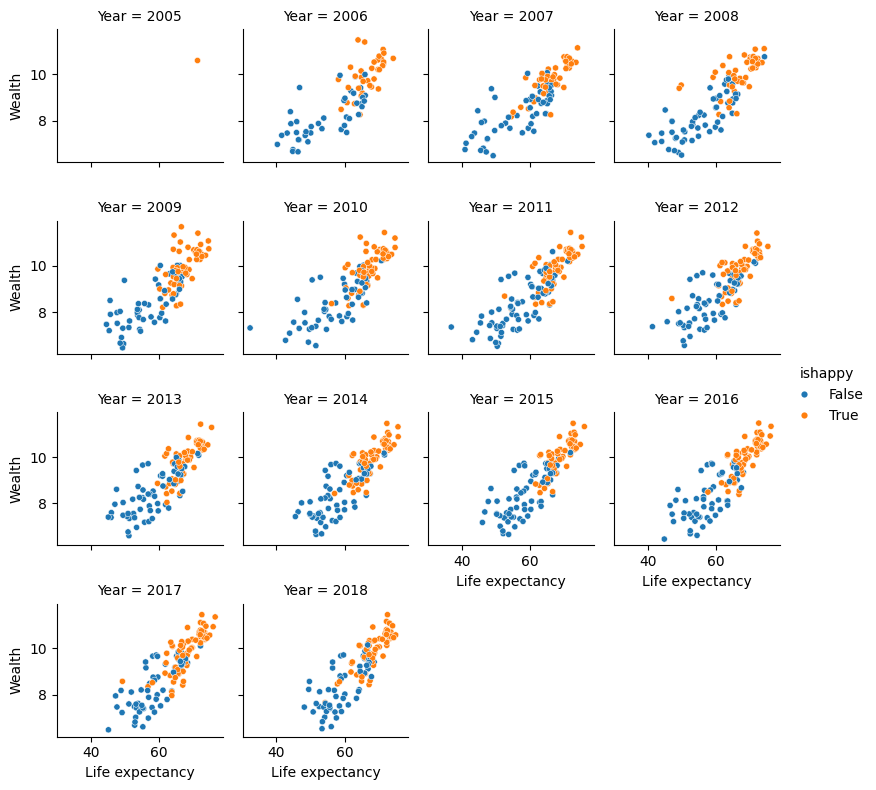

In [ ]:
# wrapped columns small multiples
#g=sns.relplot(
g=sns.relplot(
    data=happy,
    x="Life expectancy",
    y="Wealth",
    hue="ishappy",
    col="Year",
    col_wrap=4,
    height=2,
    s=20
)
#g.fig.suptitle("Life expectancy vs Wealth between 2005 and 2018 for happy and unhappy countries", y=1.05);

In [ ]:
happy[(happy.ishappy == True) &
      (happy.Year == 2012) &
      (happy["Life expectancy"].between(40,52)) &
      (happy.Wealth.between(8,9))]

Country  Year  Happiness    Wealth  Social support  Life expectancy  \
1120  Nigeria  2012   5.492954  8.582878         0.81758        47.119999   

       Freedom  Generosity  Corruption perceptions  Positive affect  \
1120  0.651689    0.054988                0.900431         0.810906   

      Negative affect  ishappy  
1120         0.209099     True

In [ ]:
# happy.groupby('Country').Happiness.mean().sort_values(ascending=False)

In [ ]:
happy.groupby('Country').Generosity.mean().sort_values(ascending=False)

Country
Myanmar      0.619942
Thailand     0.388676
Indonesia    0.373699
Laos         0.336016
Malta        0.332178
               ...   
Georgia     -0.228642
Morocco     -0.229759
Lithuania   -0.255043
Russia      -0.259866
Greece      -0.285515
Name: Generosity, Length: 157, dtype: float64